# Линейные модели, SVM и деревья решений.

## Загрузка и подготовка данных

В качестве набора данных будем использовать датасет с ценами на авокадо. Будем решать задачу регрессии и попробуем предсказать цену авокадо.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('avocado.csv')
data.shape

(18249, 14)

In [4]:
data.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [5]:
# проверяем на пропущенные значения
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [6]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [8]:
# Удалим ненужный столбец Unnmamed
data.drop('Unnamed: 0', axis = 1, inplace = True)
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [9]:
# Разобьем дату на день и месяц (год уже есть)
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].apply(lambda x:x.month)
data['Day'] = data['Date'].apply(lambda x:x.day)
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [10]:
# Удалим колонку Date, т.к. у нас уже есть дата, разбитая по трем столбцам, и колонку region, чтобы упростить задачу,
# Кодируем категориальный признак type
data= pd.get_dummies(data.drop(['region','Date'], axis=1), drop_first = True)
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29,0


## Разделение выборки на обучающую и тестовую

In [11]:
from sklearn.model_selection import train_test_split

X = data.iloc[:,1:14]
y = data['AveragePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Линейная модель

In [12]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(X_train, y_train)
pred = regr.predict(X_test)

Оценим качество линейной модели, используя метрики Mean absolute error и Mean squared error

In [13]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))

MAE: 0.2329713329170077
MSE: 0.0910880280536491


Значение метрик не очень большие, значит мы получили неплохую модель. Но построим зависимость предсказанных значений от y_test. В идеале зависимость должна быть линейная(т.к. они будут совпадать)

Text(0, 0.5, 'predicted y')

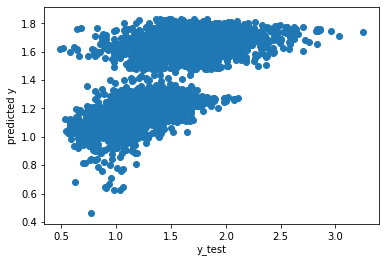

In [14]:
plt.scatter(x = y_test,y = pred)
plt.xlabel('y_test')
plt.ylabel('predicted y')

Видим, что нет прямой зависимости, значит нужна модель получше.

## SVM

In [22]:
from sklearn.svm import SVR

svm_regr = SVR()
svm_regr.fit(X_train,y_train)
pred = svm_regr.predict(X_test)

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Оценим качество модели

In [23]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))

MAE: 0.32269858615359975
MSE: 0.16066943157406918


Качество модели получилось хуже, попробуем отмасштабировать данные

In [27]:
from sklearn.preprocessing import MinMaxScaler
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(X)
sc1_data[:2]

array([[1.02634162e-03, 4.55837802e-05, 2.66015275e-03, 1.89126847e-05,
        4.48913936e-04, 6.42800568e-04, 1.63050227e-05, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 8.66666667e-01, 0.00000000e+00],
       [8.76600710e-04, 2.96470005e-05, 2.18063319e-03, 2.29064971e-05,
        4.90656794e-04, 7.02903283e-04, 1.70463985e-05, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 6.33333333e-01, 0.00000000e+00]])

In [28]:
sc_X_train, sc_X_test, sc_y_train, sc_y_test = train_test_split(sc1_data, y, test_size = 0.2, random_state = 42)

In [29]:
svm_regr = SVR()
svm_regr.fit(sc_X_train,sc_y_train)
pred = svm_regr.predict(sc_X_test)

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


MAE: 0.22156360886230775
MSE: 0.08549666455561501


Получаем качество модели, лучше, чем в линейной регрессии. Посмотрим на график.

Text(0, 0.5, 'predicted y')

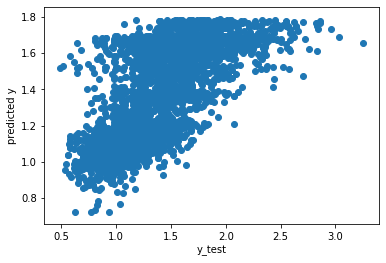

In [31]:
plt.scatter(x = sc_y_test,y = pred)
plt.xlabel('y_test')
plt.ylabel('predicted y')

## Дерево решений

In [15]:
from sklearn.tree import DecisionTreeRegressor

tree_regr = DecisionTreeRegressor()
tree_regr.fit(X_train,y_train)
pred = tree_regr.predict(X_test)

Оценим качество модели

In [16]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))

MAE: 0.1363945205479452
MSE: 0.04565041095890411


Видим, что значения метрик еще меньше, значит получили лучшую модель. Построим график.

Text(0, 0.5, 'predicted y')

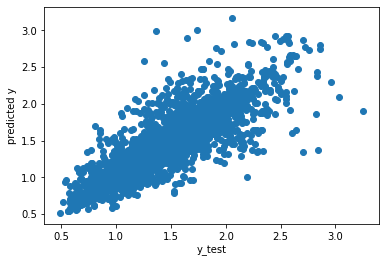

In [17]:
plt.scatter(x = y_test, y = pred)
plt.xlabel('y_test')
plt.ylabel('predicted y')

На графике также прослеживается линейная зависимость, что говорит о хорошем качестве модели.